# Model Selection
You have to use Dataset-1 for this experiment. Dataset-1 consists of train, validation, and
test files. The input is a real valued scalar and the output is also a real valued scalar. The
dataset is generated from an n-degree polynomial and a small Gaussian noise is added to
the target.

2#  Now add L2 regularization to your model. Vary the value of lambda from 0 to 1. For different
values of lambda, plot the training MSE and the validation MSE. Pick the best value of lambda and
report the test performance for the corresponding model. Also visualize the fit for the
chosen model. Comment about the quality of the fit.

In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [3]:
def getdata(filename):
    import csv
    import numpy as np
    with open (filename,'r') as csvfile:
        Dataset_1_test = csv.reader(csvfile)   
        X = []
        Y = []
        for row in Dataset_1_test:
            x = row[0]
            y = row[1]
            X.append(x)
            Y.append(y)   
        
    X = np.array(X).astype(np.float32)
    Y = np.array(Y).astype(np.float32)
    # convert rank 1 array to rank 2 array
    X = np.reshape(X, (-1, 1))
    Y = np.reshape(Y, (-1, 1))
    return X , Y

In [4]:
X_train, Y_train = getdata("F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/hwk1_datasets/Datasets/Dataset_1_train.csv")
print(X_train.shape)
print(Y_train.shape)

X_valid, Y_valid = getdata("F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/hwk1_datasets/Datasets/Dataset_1_valid.csv")
print(X_valid.shape)
print(Y_valid.shape)

(50, 1)
(50, 1)
(50, 1)
(50, 1)


# computer Xm matrix that contains polynomial terms of X

In [5]:
def getfeaturematrix (X,polynomial):
    Xm = []
    for i in range(0,polynomial+1):
        a = np.power(X,i)
        Xm.append(a)
    Xm = np.array(Xm)
    Xm = np.squeeze(Xm, axis=(2,)).T
    return Xm

In [6]:
Xm_train = getfeaturematrix (X_train,20)
feature_no = Xm_train.shape[1]
print(Xm_train.shape)

Xm_valid = getfeaturematrix (X_valid,20)
print(Xm_valid.shape)

(50, 21)
(50, 21)


# W Computation function

In [7]:
def computeW (Xm_train,Y_train,feature_no,lmbda):
    a = np.dot(Xm_train.T,Xm_train) + lmbda*np.eye(feature_no)
    a = np.linalg.pinv(a)
    W = np.dot(a, np.dot(Xm_train.T,Y_train))
    return W

# MSE computation function

In [8]:
def computeMSE (Hypothesis,Y,lmbda,W):
    MSE = np.mean((Hypothesis-Y)**2) + ( lmbda * (np.dot(W.T,W)) )
    return MSE

# Compute hypothesis and MSE

In [9]:
MSE_traindata = []
MSE_validdata = []
for i in range (0,11):
    lmbda = i/10
    
    W = computeW (Xm_train,Y_train,feature_no,lmbda)
    
    Hypothesis_train = np.dot(Xm_train,W)
    Hypothesis_valid = np.dot(Xm_valid,W)
    
    MSE_traindata = np.append ( computeMSE (Hypothesis_train,Y_train,lmbda,W), MSE_traindata )
    MSE_validdata = np.append ( computeMSE (Hypothesis_valid,Y_valid,lmbda,W), MSE_validdata )

In [10]:
MSE_traindata

array([120.89076778, 110.75119896, 100.42119688,  89.89905885,
        79.18488196,  68.28228917,  57.2023879 ,  45.97422452,
        34.67857532,  23.59384349,   8.40672727])

# Ploting MSE for diffetern Lambda value

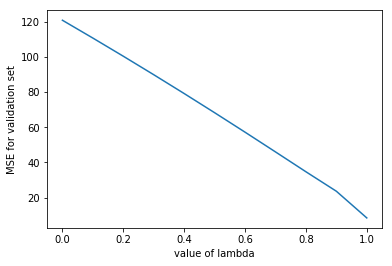

In [11]:
plt.plot(np.arange(0,1.01,0.1),np.array(MSE_traindata) )
plt.xlabel('value of lambda')
plt.ylabel('MSE for validation set')
plt.savefig('F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/fig1#2#1.png')

In [12]:
MSE_validdata

array([121.38498179, 111.23201326, 100.88862673,  90.35289454,
        79.62454557,  68.70656678,  57.60888711,  46.35815871,
        35.02968043,  23.88823443,  30.92416148])

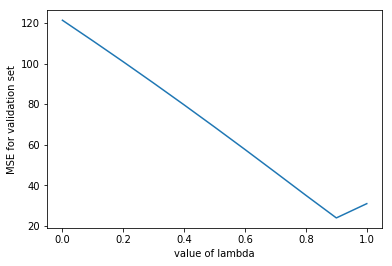

In [13]:
plt.plot(np.arange(0,1.01,0.1),np.array(MSE_validdata) )
plt.xlabel('value of lambda')
plt.ylabel('MSE for validation set')
plt.savefig('F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/fig1#2#2.png')

# plotting Y approximation of trainning data (Hypothesis_train)

## As for validation, we get least MSE for lambda = 0.9 

In [14]:
lmbda = 0.9
W = computeW (Xm_train,Y_train,feature_no,lmbda)
    
Hypothesis_train = np.dot(Xm_train,W)
Hypothesis_valid = np.dot(Xm_valid,W)

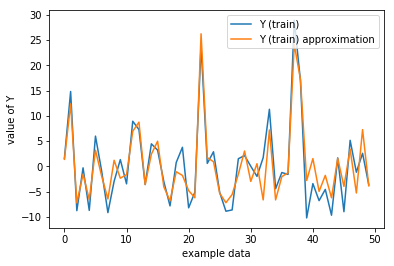

In [18]:
plt.plot(Y_train)
plt.plot(Hypothesis_train)
plt.legend(['Y (train)','Y (train) approximation'])
plt.xlabel('example data')
plt.ylabel('value of Y')
plt.savefig('F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/fig1#2#3.png')

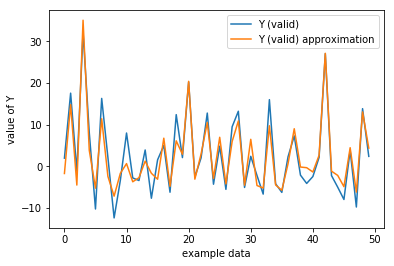

In [17]:
plt.plot(Y_valid)
plt.plot(Hypothesis_valid)
plt.legend(['Y (valid)','Y (valid) approximation'])
plt.xlabel('example data')
plt.ylabel('value of Y')
plt.savefig('F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/fig1#2#4.png')

In [21]:
print(MSE_traindata)

[120.89076778 110.75119896 100.42119688  89.89905885  79.18488196
  68.28228917  57.2023879   45.97422452  34.67857532  23.59384349
   8.40672727]


In [22]:
print(MSE_validdata)

[121.38498179 111.23201326 100.88862673  90.35289454  79.62454557
  68.70656678  57.60888711  46.35815871  35.02968043  23.88823443
  30.92416148]


for lambda = 0.9 we get validation error of 23.88 and training error 23.59. We can see for training data lambda = 1 would give the least MSE but it might be overfitting the data as we seem to get a increased MSE in validation set.

As the for high lambda (lambda=0.9) we best fit, which basically means penalizing the higher order terms in W and esentially making the higher degree on polynomial of X to zero. Thus the degree of the source can be assumed to be two or three.